In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('science')


#Functions to fit to the experimental data.
def gauss_fit (x, A, x0, s):
        return A * np.exp(-(x-x0)**2/(2*s**2))

def linear (x, a, b):
        return a *x + b

def hbar_fit(x, a):
        e = 1.6021 * 10**(-19)
        c = 2.9979 * 10**8
        return a* c/(x*e)



#Convert angle of refraction to wavelength using Bragg's Law.
def braggwavl (th, d):
        return 2*d*np.sin(th)

Angles and Error
6.540490601287948 0.33483726204334124
7.378337662100106 0.19506602092666203
13.065042141543662 0.5365607505858127
14.734677906630536 0.16500765863640499
19.765862979567363 -0.25030375090364365
22.34774392943218 -0.18678747775066004


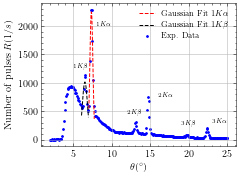

In [25]:
data = np.loadtxt('1meros.txt')
x = data[:,0]
y = data[:,1]


print('Angles and Error')
popt1b, pcov1b = curve_fit(gauss_fit, x[41:51], y[41:51], p0=(1000, 6, 1))
print(popt1b[1], popt1b[2])
t1b = np.linspace(x[41], x[51]-0.1, 100)

popt1a, pcov1a = curve_fit(gauss_fit, x[50:60], y[50:60], p0=(1100, 6, 1))
print(popt1a[1], popt1a[2])
t1a = np.linspace(x[51]-0.05, x[57]+0.05, 100)


popt2b, pcov2b = curve_fit(gauss_fit, x[103:120], y[103:120], p0=(300, 13, 1))
print(popt2b[1], popt2b[2])
t2b = np.linspace(x[103], x[120], 100)

popt2a, pcov2a = curve_fit(gauss_fit, x[122:135], y[122:135], p0=(300, 15, 1))
print(popt2a[1], popt2a[2])
t2a = np.linspace(x[122]+0.2, x[135]-0.5, 100)

popt3b, pcov3b = curve_fit(gauss_fit, x[175:182], y[175:182], p0=(90, 20, 1))
print(popt3b[1], popt3b[2])
t3b = np.linspace(x[175], x[181], 100)

popt3a, pcov3a = curve_fit(gauss_fit, x[200:210], y[200:210], p0=(200, 22, 1))
print(popt3a[1], popt3a[2])
t3a = np.linspace(x[200], x[210], 100)


plt.plot(t1a, gauss_fit(t1a, *popt1a), 'r--', label=r'Gaussian Fit $1K\alpha$')
plt.plot(t1b, gauss_fit(t1b, *popt1b), 'k--', label=r'Gaussian Fit $1K\beta$')

plt.scatter(x, y, color='blue', s=3, label='Exp. Data')
plt.text(5, 1250, r'$1K\beta$', fontsize=6)
plt.text(8, 2000, r'$1K\alpha$', fontsize=6)
plt.text(12, 450, r'$2K\beta$', fontsize=6)
plt.text(16, 750, r'$2K\alpha$', fontsize=6)
plt.text(19, 250, r'$3K\beta$', fontsize=6)
plt.text(23, 300, r'$3K\alpha$', fontsize=6)
plt.ylabel(r'Number of pulses $R (1/s)$')
plt.xlabel(r'$\theta (^\circ)$')
plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('1meros1.jpg', dpi=600)
wavl = 71.08
th1a = popt1a[1]*np.pi/180

[563.72910539  -1.2312119 ]
[0.48611863 0.1261717 ]
Deviation  0.05157522953555449
Relative Deviation  0.5984025127594511
Relative Error  0.0008623266481072855


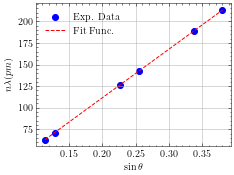

In [13]:
th = np.array([popt1a[1], popt1b[1], popt2a[1], popt2b[1], popt3a[1], popt3b[1]])
ka = 71.08
kb = 63.09
y = np.array([ka, kb, 2*ka, 2*kb, 3*ka, 3*kb])
x = np.sin(th*np.pi/180)

popt, pcov = curve_fit(linear, x, y, p0=(500, 10))
print(popt)
print(np.sqrt(np.diag(pcov)))
t = np.linspace(min(x), max(x), 100)

a = 564.02

plt.scatter(x, y, color='blue', label='Exp. Data')
plt.plot(t, linear(t, *popt), 'r--', label='Fit Func.')
plt.legend()
plt.ylabel(r'$n\lambda (pm)$')
plt.xlabel(r'$\sin\theta$')
plt.grid()
plt.savefig('1meros2.jpg', dpi=600)

print('Deviation ', np.abs(a-popt[0])*100/a)
print('Relative Deviation ', np.abs(a-popt[0])/np.sqrt(np.diag(pcov))[0])
print('Relative Error ', np.sqrt(np.diag(pcov))[0]/popt[0])
d = popt[0]/2

[   18.83581778 -1048.11368292]
[   27.31038991 -1386.03835998]
[   41.33076845 -1936.77449325]
[   59.39114263 -2588.13885089]
[   70.35452891 -2839.6153004 ]
[   83.61219942 -3143.85240111]
[  114.93966512 -4116.96477835]
[  127.05702171 -4421.75229539]


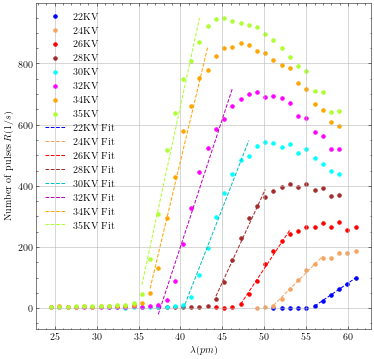

In [22]:
data22kv = np.loadtxt('22kv.txt')
data24kv = np.loadtxt('24kv.txt')
data26kv = np.loadtxt('26kv.txt')
data28kv = np.loadtxt('28kv.txt')
data30kv = np.loadtxt('30kv.txt')
data32kv = np.loadtxt('32kv.txt')
data34kv = np.loadtxt('34kv.txt')
data35kv = np.loadtxt('35kv.txt')


x22 = data22kv[:,0]*np.pi/180
x24 = data24kv[:,0]*np.pi/180
x26 = data26kv[:,0]*np.pi/180
x28 = data28kv[:,0]*np.pi/180
x30 = data30kv[:,0]*np.pi/180
x32 = data32kv[:,0]*np.pi/180
x34 = data34kv[:,0]*np.pi/180
x35 = data35kv[:,0]*np.pi/180

wavl22 = braggwavl(x22, d)
wavl24 = braggwavl(x24, d)
wavl26 = braggwavl(x26, d)
wavl28 = braggwavl(x28, d)
wavl30 = braggwavl(x30, d)
wavl32 = braggwavl(x32, d)
wavl34 = braggwavl(x34, d)
wavl35 = braggwavl(x35, d)


y22 = data22kv[:,1]
y24 = data24kv[:,1]
y26 = data26kv[:,1]
y28 = data28kv[:,1]
y30 = data30kv[:,1]
y32 = data32kv[:,1]
y34 = data34kv[:,1]
y35 = data35kv[:,1]

#We need to get only the linear part of each set of measurements.
xmin22 = np.where(wavl22>55)[0][1]
popt22, pcov22 = curve_fit(linear, wavl22[xmin22:len(wavl22)], y22[xmin22:len(wavl22)], p0=(10, -500))
print(popt22)
xmin24 = np.where(wavl24>50)[0][1]
xmax24 = np.where(wavl24>56)[0][1]
popt24, pcov24 = curve_fit(linear, wavl24[xmin24:xmax24], y24[xmin24:xmax24], p0=(15, -400))
print(popt24)
xmin26 = np.where(wavl26>46)[0][1]
xmax26 = np.where(wavl26>53)[0][1]
popt26, pcov26 = curve_fit(linear, wavl26[xmin26:xmax26], y26[xmin26:xmax26], p0=(15, -400))
print(popt26)
xmin28 = np.where(wavl28>43)[0][1]
xmax28 = np.where(wavl28>50)[0][1]
popt28, pcov28 = curve_fit(linear, wavl28[xmin28:xmax28], y28[xmin28:xmax28], p0=(15, -400))
print(popt28)
xmin30 = np.where(wavl30>39)[0][1]
xmax30 = np.where(wavl30>48)[0][1]
popt30, pcov30 = curve_fit(linear, wavl30[xmin30:xmax30], y30[xmin30:xmax30], p0=(15, -400))
print(popt30)
xmin32 = np.where(wavl32>36)[0][1]
xmax32 = np.where(wavl32>46)[0][1]
popt32, pcov32 = curve_fit(linear, wavl32[xmin32:xmax32], y32[xmin32:xmax32], p0=(15, -400))
print(popt32)
xmin34 = np.where(wavl34>35)[0][1]
xmax34 = np.where(wavl34>43)[0][1]
popt34, pcov34 = curve_fit(linear, wavl34[xmin34:xmax34], y34[xmin34:xmax34], p0=(15, -400))
print(popt34)
xmin35 = np.where(wavl35>34)[0][1]
xmax35 = np.where(wavl35>42)[0][1]
popt35, pcov35 = curve_fit(linear, wavl35[xmin35:xmax35], y35[xmin35:xmax35], p0=(15, -400))
print(popt35)

plt.figure(figsize=(6,6))
plt.scatter(wavl22, y22, color='blue', s=12, label='22KV')
plt.scatter(wavl24, y24, color='sandybrown', s=12, label='24KV')
plt.scatter(wavl26, y26, color='red', s=12, label='26KV')
plt.scatter(wavl28, y28, color='brown', s=12, label='28KV')
plt.scatter(wavl30, y30, color='cyan', s=12, label='30KV')
plt.scatter(wavl32, y32, color='magenta', s=12, label='32KV')
plt.scatter(wavl34, y34, color='orange', s=12, label='34KV')
plt.scatter(wavl35, y35, color='greenyellow', s=12, label='35KV')
plt.plot(wavl22[xmin22:len(wavl22)], linear(wavl22[xmin22:len(wavl22)], *popt22), 'b--', label='22KV Fit')
plt.plot(wavl24[xmin24:xmax24], linear(wavl24[xmin24:xmax24], *popt24), color='sandybrown', linestyle='--', label='24KV Fit')
plt.plot(wavl26[xmin26:xmax26], linear(wavl26[xmin26:xmax26], *popt26), 'r--', label='26KV Fit')
plt.plot(wavl28[xmin28:xmax28], linear(wavl28[xmin28:xmax28], *popt28), color='brown', linestyle='--', label='28KV Fit')
plt.plot(wavl30[xmin30:xmax30], linear(wavl30[xmin30:xmax30], *popt30), 'c--', label='30KV Fit')
plt.plot(wavl32[xmin32:xmax32], linear(wavl32[xmin32:xmax32], *popt32), 'm--', label='32KV Fit')
plt.plot(wavl34[xmin34:xmax34], linear(wavl34[xmin34:xmax34], *popt34), color='orange', linestyle='--', label='34KV Fit')
plt.plot(wavl35[xmin35:xmax35], linear(wavl35[xmin35:xmax35], *popt35), color='greenyellow', linestyle='--', label='35KV Fit')

plt.grid()
plt.ylabel(r'Number of pulses $R (1/s)$')
plt.xlabel(r'$\lambda (pm)$')
plt.legend()
plt.savefig('2meros1.jpg', dpi=600)

6.495638556067521e-25
1.2317527329422544e-27
Deviation  2.0265677817870196
Relative Deviation  10.908150665234075
Relative Error  0.0018962765897614247


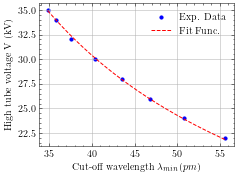

In [24]:
lmin = np.array([popt22[1]/popt22[0], popt24[1]/popt24[0], popt26[1]/popt26[0], popt28[1]/popt28[0], popt30[1]/popt30[0], popt32[1]/popt32[0], popt34[1]/popt34[0], popt35[1]/popt35[0]])
lmin = np.abs(lmin)
V = np.array([22, 24, 26, 28, 30, 32, 34, 35])

popt, pcov = curve_fit(hbar_fit, lmin, V)
print(popt[0])
print(np.sqrt(np.diag(pcov))[0])
x = np.linspace(min(lmin), max(lmin), 1000)


plt.scatter(lmin, V, color='blue', s=10, label='Exp. Data')
plt.plot(x, hbar_fit(x, *popt), 'r--', label='Fit Func.')
plt.grid()
plt.legend()
plt.ylabel(r'High tube voltage V (kV)')
plt.xlabel(r'Cut-off wavelength $\lambda_{min} (pm)$')
plt.savefig('2meros2.jpg', dpi=600)
h = 6.63 * 10**(-25)
print('Deviation ', np.abs(h-popt[0])*100/h)
print('Relative Deviation ', np.abs(h - popt[0])/np.sqrt(np.diag(pcov))[0])
print('Relative Error ', np.sqrt(np.diag(pcov))[0]/popt[0])